In [14]:
import os

import pandas as pd

%matplotlib inline
from CheXpert2 import names
import cv2
from CheXpert2.dataloaders.CXRLoader import CXRLoader
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Step 1 : Initiating the dataset

Since we don't train the model, we only need one dataset

In [16]:
img_dir="/mnt/f/IA-med_img"
os.environ["DEBUG"]="False"
dataset = CXRLoader(
            split="Train",
            img_dir=img_dir,
            img_size=224,
            prob=[0,0,0,0,0,0],
            intensity=0,
            label_smoothing=0,
            channels=1,
            use_frontal=False,
            datasets=["ChexPert"]
        )
i=0

/mnt/f/IA-med_img/CheXpert2/dataloaders/CXRLoader.py:212: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby("Exam ID").mean().round(0)


# Step 2 : Assert the dataloader is working ; Require the images on the device

torch.Size([2, 224, 224])
255
255


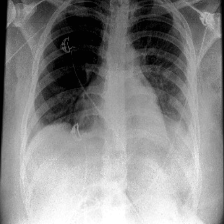

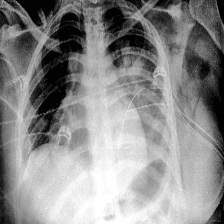

torch.Size([2, 224, 224])
255
255


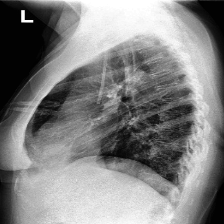

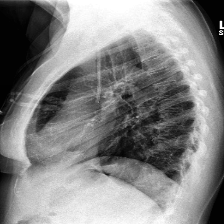

torch.Size([2, 224, 224])
255
255


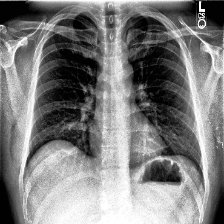

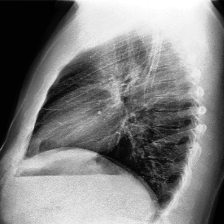

torch.Size([2, 224, 224])
255
255


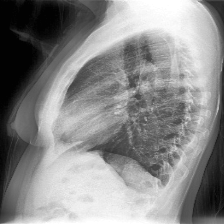

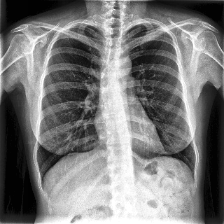

torch.Size([2, 224, 224])
255
255


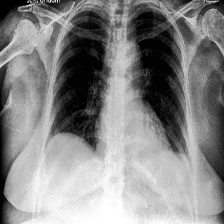

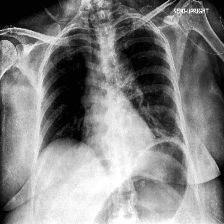

torch.Size([2, 224, 224])
255
255


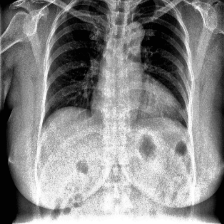

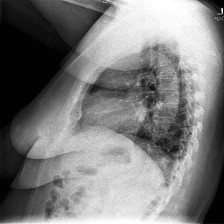

torch.Size([2, 224, 224])
255
255


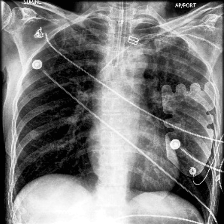

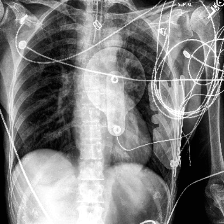

torch.Size([2, 224, 224])
255
255


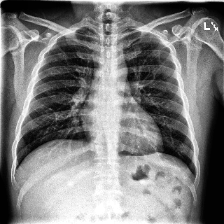

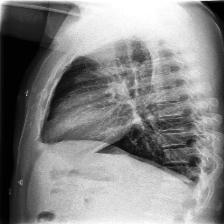

torch.Size([2, 224, 224])
255
255


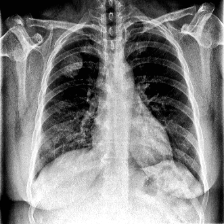

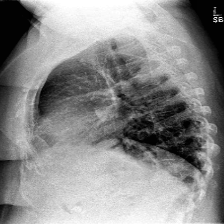

torch.Size([2, 224, 224])
255
0


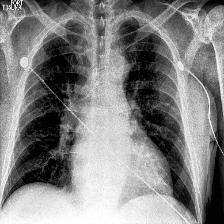

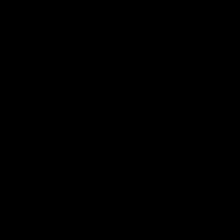

In [18]:
import time
for i in range(10,20) :
    images,label,idx = dataset[i]
    print(images.shape)
    frontal,lateral =   images[0,:,:].numpy().astype(np.uint8),images[1,:,:].numpy().astype(np.uint8)
    #frontal,lateral = cv2.cvtColor(frontal[:,:,None],cv2.COLOR_GRAY2RGB),cv2.cvtColor(lateral[:,:,None],cv2.COLOR_GRAY2RGB)
    print(np.max(frontal))
    print(np.max(lateral))
    frontal_image = Image.fromarray(frontal)
    lateral_image = Image.fromarray(lateral)
    frontal_image.show()
    lateral_image.show()


# Step 2.2 : We can test the data augmentations !

In [ ]:
import albumentations as A
import cv2 as cv
#image  = A.augmentations.geometric.transforms.Affine(scale=(0.95,1.05),translate_percent=(0.05,0.05),rotate=(-15,15),shear=None,cval=0,keep_ratio=True,p=1)(image=np.array(frontal_image)[:,:,None])["image"]

# image  = A.augmentations.transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, always_apply=False,p=1)(image=np.array(frontal_image)[:,:,None])["image"]

image = A.GridDistortion(num_steps=1,distort_limit=0.3,interpolation=1,border_mode=0,value=None,mask_value=None,always_apply=False,p=1)(image=np.array(frontal_image)[:,:,None])["image"]

# image = A.ElasticTransform(alpha=0.2, sigma=25, alpha_affine=50, interpolation=1, value=None,p=1, border_mode=cv.BORDER_CONSTANT)(image=np.array(frontal_image)[:,:,None])["image"]

image = Image.fromarray(image.squeeze())

image.show()

# Step 3 : Let's now plot some information about the dataset

In [ ]:

data = np.concatenate([dataset.count.reshape((1,18)),dataset.count.reshape((1,18))/len(dataset)])
data = pd.DataFrame(data,columns=names,index=["Count","Ratio"])
print(data)


In [ ]:
plt.bar(x=range(0,len(names)),height=dataset.count,label=names)
plt.show()

# Let's now verify the dataloader ; does it extract the classes as we want to?

In [ ]:
import torch
%matplotlib inline
second_image_count=0


labels=torch.zeros((len(names)))

for image,label,idx in dataset :
    if torch.max(image[1])==0 :
        second_image_count+=1

    labels+=label

print("The ratio of images with a second image : ", second_image_count/len(dataset))
plt.bar(x=range(0,len(names)),height=labels,label=names)
plt.show()